## KNN classifier

### Importando bibliotecas necessárias

In [2]:
import sklearn as sk
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.externals import joblib
from tempfile import TemporaryFile


### Importando os dados necessários para a análise

In [3]:
data = pd.read_csv('../dataset_bacteria.csv')
data = data.sort_values(['Tipo'])

### Derivando dados para análises posteriores

In [4]:
data['volumecorpo'] = np.array(data['comprimentocorpo']) * np.pi*(np.array(data['larguracorpo'])/2)**2
data['volumeflagelo'] = np.array(data['comprimentoflagelo']) * np.pi*(np.array(data['larguraflagelo'])/2)**2

### Preparando dados de treino 

In [5]:
y = data.iloc[:,4].values

x = data.iloc[:,[2,3]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

### Preparando parâmetros dos gráficos para a exibição dos dados

In [6]:
plt.close('all')
f, axarr = plt.subplots(3, 5, figsize=(15,15))

h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Aplicando KNN aos dados e construindo gráficos para análise

In [12]:
row = 0
scores = []
max_score = 0
for n in range(0,15):
    column = (n % 5)
    if column == 0 and n > 0:
        row = row + 1
        
    knn= neighbors.KNeighborsClassifier(n + 1,'uniform')
    knn.fit(x_train,y_train)
    y_pred= knn.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    #print(cm)
    #print("_______")
    score = knn.score(x_test,y_test)
    if score > max_score:
        joblib.dump(knn, '../Modelos/knnBacteria.sav')
    scores.append(score)
    #print(score)
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #xarr[row, column].figure()
    axarr[row, column].pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    axarr[row, column].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=20)
    axarr[row, column].set_xlim(xx.min(), xx.max())
    axarr[row, column].set_ylim(yy.min(), yy.max())
    axarr[row, column].set_title("KNN classification (k = %i)" % (n + 1))

### Exibindo gráficos da aplicação do KNN variando o parâmetro k

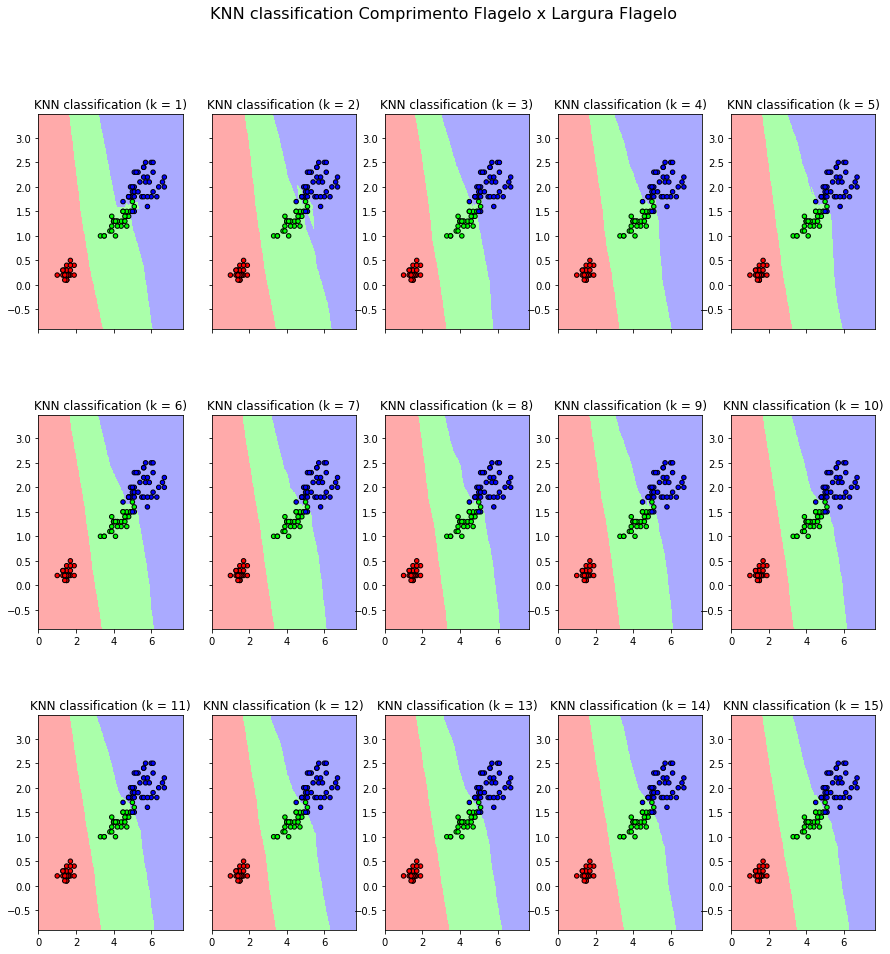

In [13]:
f.subplots_adjust(hspace=0.4)
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
f.suptitle('KNN classification Comprimento Flagelo x Largura Flagelo', fontsize=16)
plt.savefig('graficos/ComprimentoFlageloxLarguraFlagelo.png')
plt.show()

### Construindo gráfico dos scores para cada parâmetro K

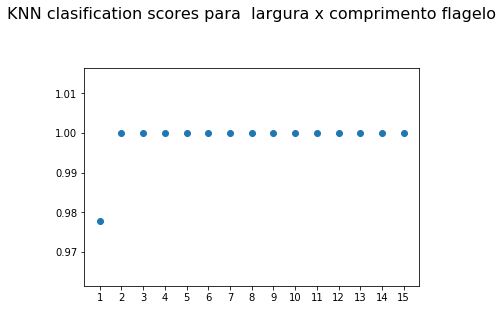

In [14]:
x_axis = [i for i in range(1,16)]
plt.scatter(x_axis, scores)
plt.title("KNN clasification scores para  largura x comprimento flagelo", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.savefig('graficos/ComprimentoFlageloxLarguraFlagelo_kscores.png')
plt.show()

## Análise para volume do corpo x volume do flagelo

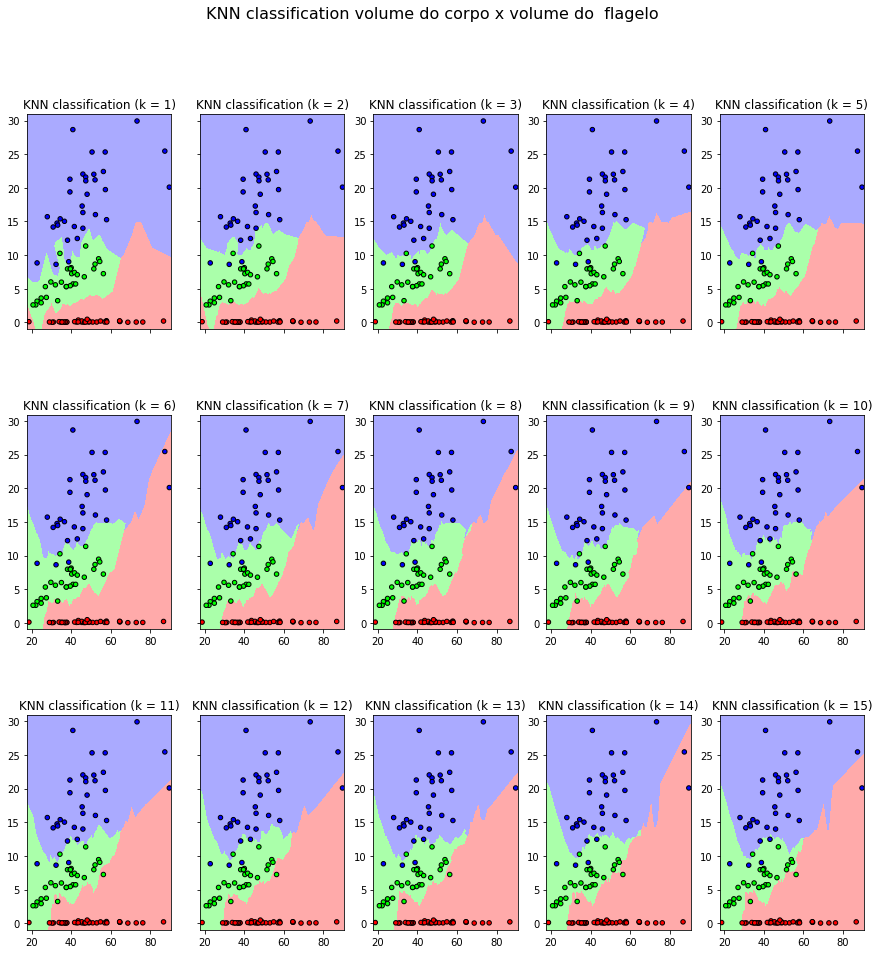

In [17]:
y = data.iloc[:,4].values

x = data.iloc[:,[5,6]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
plt.close('all')
f, axarr = plt.subplots(3, 5, figsize=(15,15))

h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
row = 0
scores = []
max_score = 0
for n in range(0,15):
    column = (n % 5)
    if column == 0 and n > 0:
        row = row + 1
        
    knn= neighbors.KNeighborsClassifier(n + 1,'uniform')
    knn.fit(x_train,y_train)
    y_pred= knn.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    if score > max_score:
        joblib.dump(knn, '../Modelos/knnBacteriaVolumeCorpoxVolumeFlagelo.sav')
    #print(cm)
    #print("_______")
    score = knn.score(x_test,y_test)
    scores.append(score)
    #print(score)
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #xarr[row, column].figure()
    axarr[row, column].pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    axarr[row, column].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=20)
    axarr[row, column].set_xlim(xx.min(), xx.max())
    axarr[row, column].set_ylim(yy.min(), yy.max())
    axarr[row, column].set_title("KNN classification (k = %i)" % (n + 1))

f.subplots_adjust(hspace=0.4)
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
f.suptitle('KNN classification volume do corpo x volume do  flagelo', fontsize=16)
plt.savefig('graficos/VolumeCorpoxVolumeFlagelo.png')
plt.show()


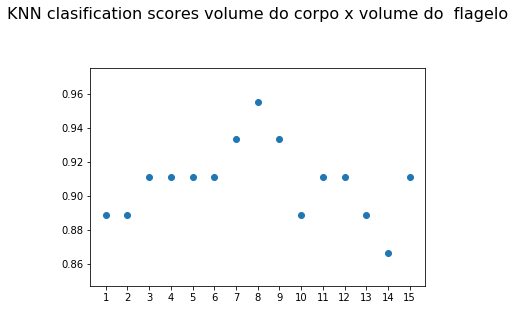

In [18]:
x_axis = [i for i in range(1,16)]
plt.scatter(x_axis, scores)
plt.title("KNN clasification scores volume do corpo x volume do  flagelo", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.savefig('graficos/VolumeCorpoxVolumeFlagelo_kscores.png')
plt.show()

### Análise de largura flagelo x largura corpo

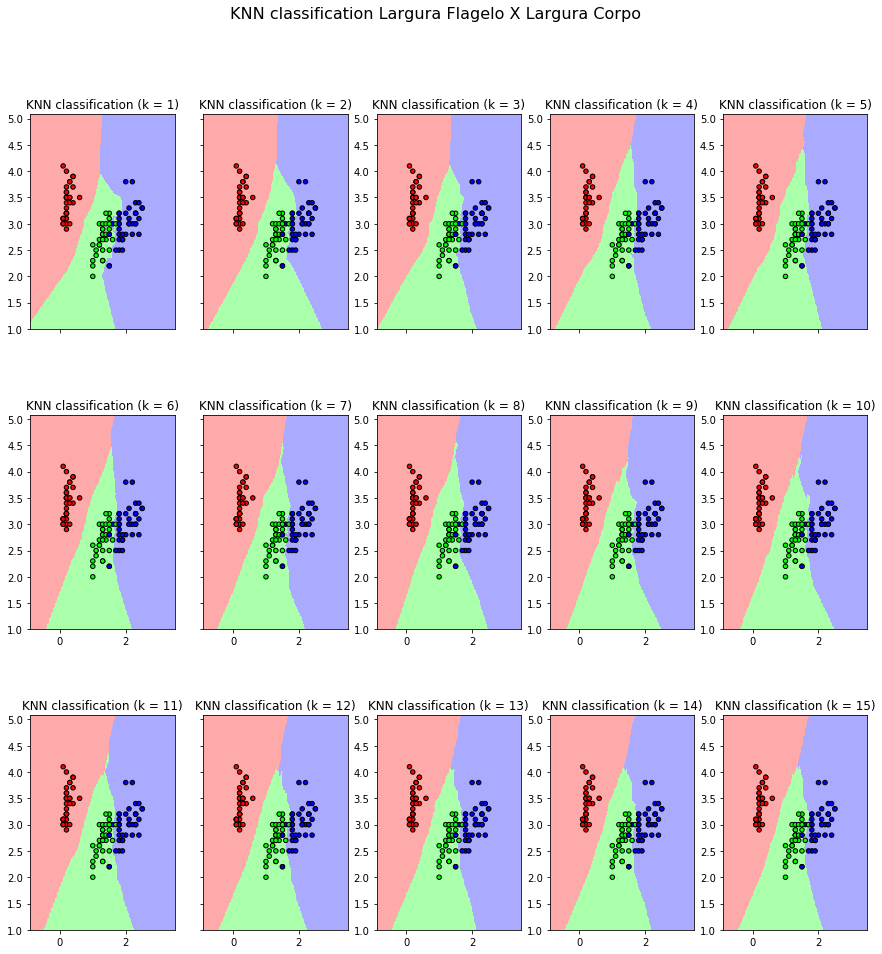

In [22]:
y = data.iloc[:,4].values

x = data.iloc[:,[3,1]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
plt.close('all')
f, axarr = plt.subplots(3, 5, figsize=(15,15))

h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
row = 0
scores = []
max_score = 0
for n in range(0,15):
    column = (n % 5)
    if column == 0 and n > 0:
        row = row + 1
        
    knn= neighbors.KNeighborsClassifier(n + 1,'uniform')
    knn.fit(x_train,y_train)
    y_pred= knn.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    if score > max_score:
        joblib.dump(knn, '../Modelos/knnLarguraFlageloxlarguracorpo.sav')
    #print(cm)
    #print("_______")
    score = knn.score(x_test,y_test)
    scores.append(score)
    #print(score)
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #xarr[row, column].figure()
    axarr[row, column].pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    axarr[row, column].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=20)
    axarr[row, column].set_xlim(xx.min(), xx.max())
    axarr[row, column].set_ylim(yy.min(), yy.max())
    axarr[row, column].set_title("KNN classification (k = %i)" % (n + 1))

f.subplots_adjust(hspace=0.4)
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
f.suptitle('KNN classification Largura Flagelo X Largura Corpo', fontsize=16)
plt.savefig('graficos/LarguraFlageloxLarguraCorpo.png')
plt.show()


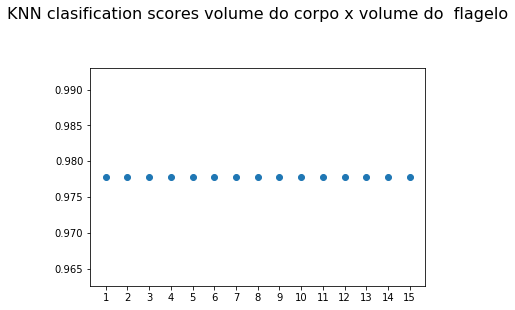

In [23]:
x_axis = [i for i in range(1,16)]
plt.scatter(x_axis, scores)
plt.title("KNN clasification scores volume do corpo x volume do  flagelo", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.savefig('graficos/LarguraFlageloxLarguraCorpo_kscores.png')
plt.show()